In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load data
data=pd.read_csv('MBA.csv')

data.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620,3,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680,5,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710,5,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690,6,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590,5,Consulting,NaN


C:\Users\coolw\AppData\Local\Temp\ipykernel_17972\2320952631.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")


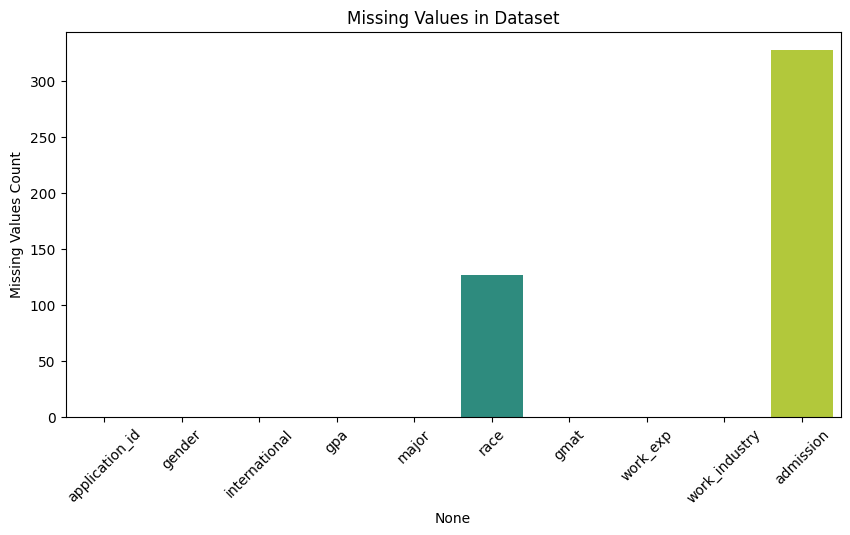

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check missing values
df=pd.read_csv('MBA.csv')
missing_values = df.isnull().sum()

# Plot missing values
plt.figure(figsize=(10, 5))
sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")
plt.xticks(rotation=45)
plt.ylabel("Missing Values Count")
plt.title("Missing Values in Dataset")
plt.show()

# Display missing values count
missing_values

# Drop missing values
df.dropna(inplace=True)

In [49]:
# Handle missing values

# Fill missing race values with the most frequent category (mode)
df['race'].fillna(df['race'].mode()[0], inplace=True)

# Drop rows where admission is missing (assuming it's the target variable)
df.dropna(subset=['admission'], inplace=True)

# Verify missing values after handling
df.isnull().sum()


C:\Users\coolw\AppData\Local\Temp\ipykernel_17972\1308499984.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['race'].fillna(df['race'].mode()[0], inplace=True)


application_id    0
gender            0
international     0
gpa               0
major             0
race              0
gmat              0
work_exp          0
work_industry     0
admission         0
dtype: int64

C:\Users\coolw\AppData\Local\Temp\ipykernel_17972\967804284.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['admission'], ax=axes[1, 1], palette="pastel")


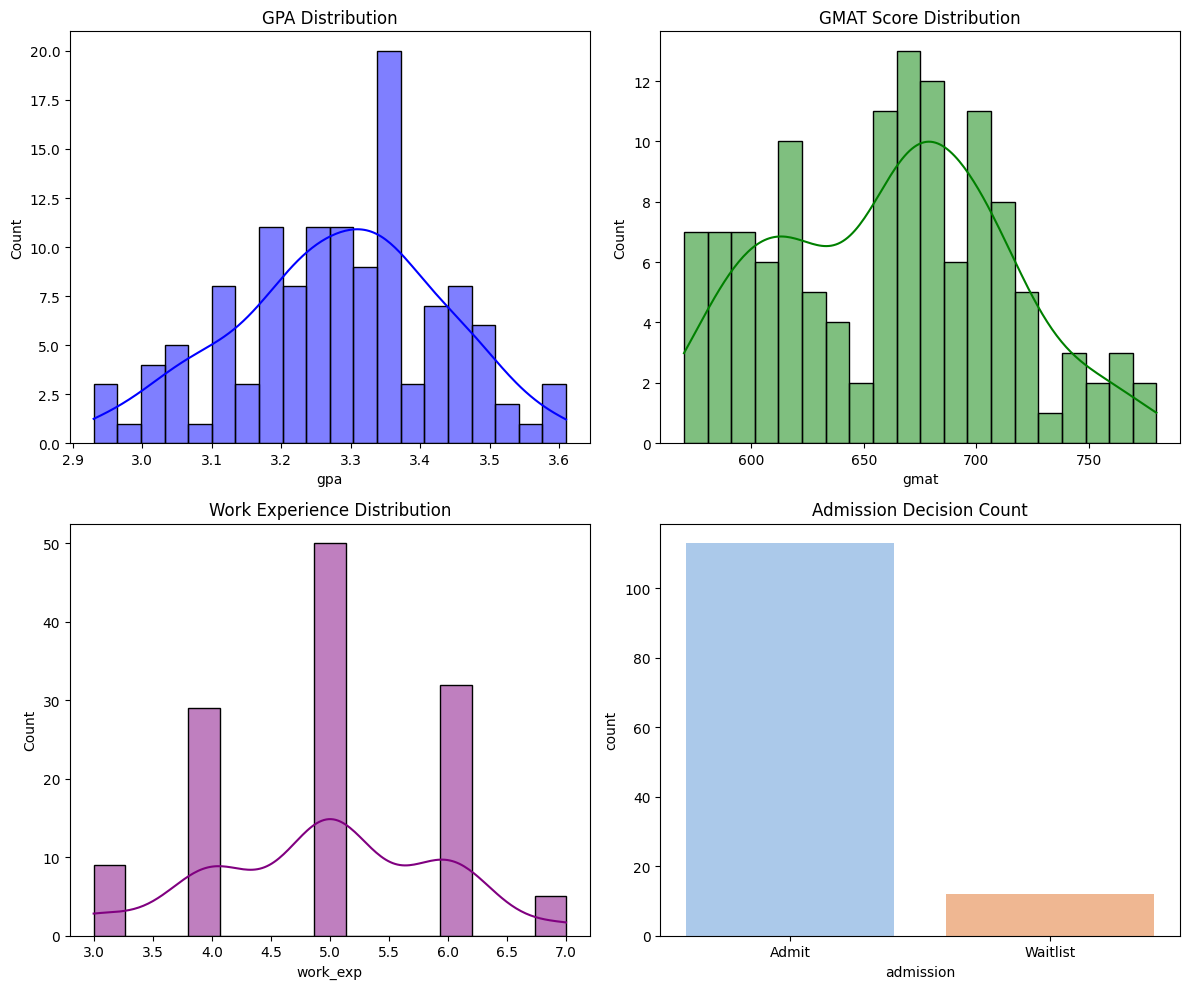

In [50]:
# Univariate Analysis: Visualizing distributions of numerical variables

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.histplot(df['gpa'], kde=True, bins=20, ax=axes[0, 0], color="blue")
axes[0, 0].set_title("GPA Distribution")

sns.histplot(df['gmat'], kde=True, bins=20, ax=axes[0, 1], color="green")
axes[0, 1].set_title("GMAT Score Distribution")

sns.histplot(df['work_exp'], kde=True, bins=15, ax=axes[1, 0], color="purple")
axes[1, 0].set_title("Work Experience Distribution")

sns.countplot(x=df['admission'], ax=axes[1, 1], palette="pastel")
axes[1, 1].set_title("Admission Decision Count")

plt.tight_layout()
plt.show()


C:\Users\coolw\AppData\Local\Temp\ipykernel_17972\2958527954.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='admission', y='gpa', data=df, ax=axes[0], palette="coolwarm")
C:\Users\coolw\AppData\Local\Temp\ipykernel_17972\2958527954.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='admission', y='gmat', data=df, ax=axes[1], palette="coolwarm")
C:\Users\coolw\AppData\Local\Temp\ipykernel_17972\2958527954.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='admission', y='work_exp', data=df, ax=axes[2], palette="coolwarm")


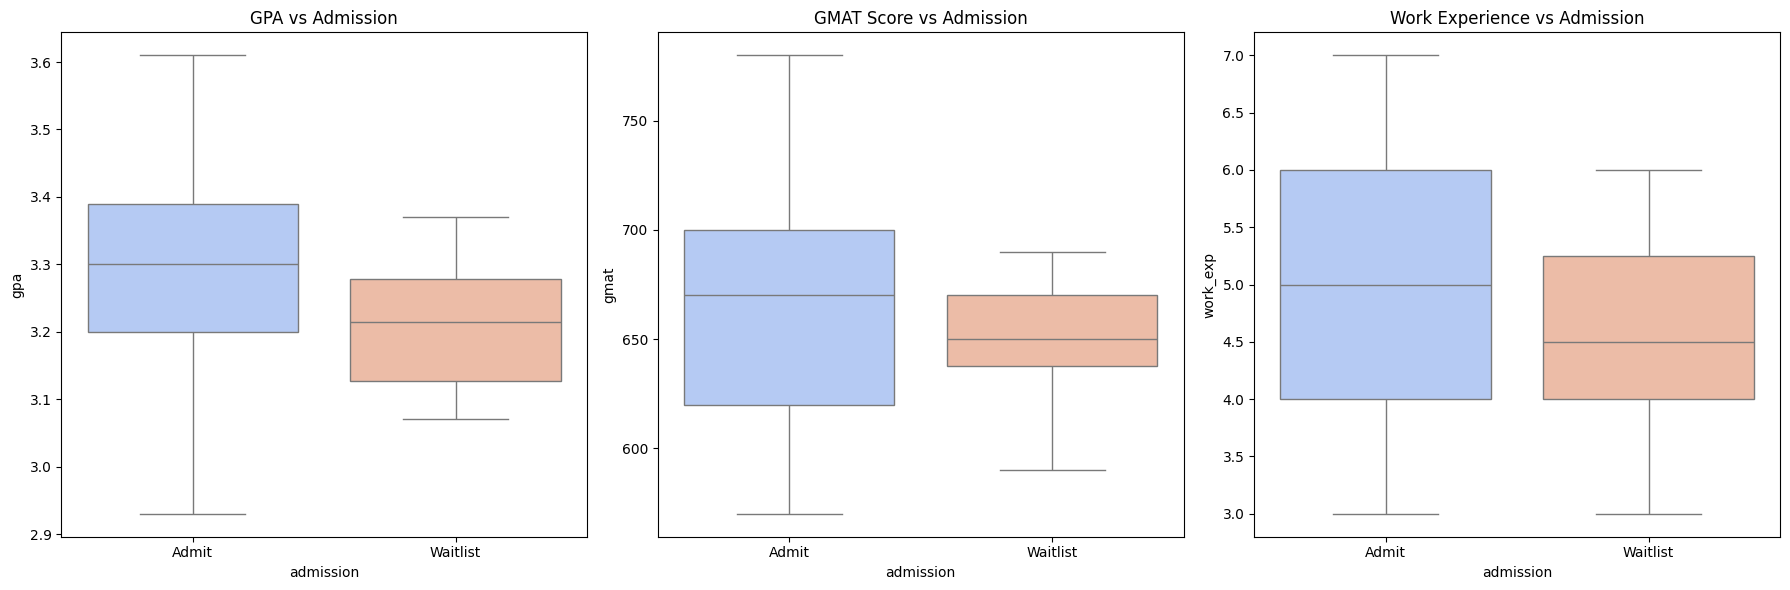

In [51]:
# Bivariate Analysis: Boxplots to compare numerical features against admission decisions

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(x='admission', y='gpa', data=df, ax=axes[0], palette="coolwarm")
axes[0].set_title("GPA vs Admission")

sns.boxplot(x='admission', y='gmat', data=df, ax=axes[1], palette="coolwarm")
axes[1].set_title("GMAT Score vs Admission")

sns.boxplot(x='admission', y='work_exp', data=df, ax=axes[2], palette="coolwarm")
axes[2].set_title("Work Experience vs Admission")

plt.tight_layout()
plt.show()


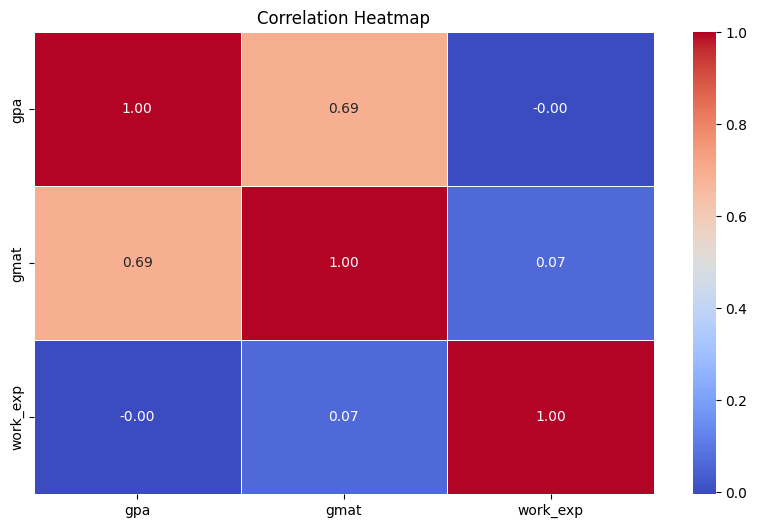

In [52]:
# Multivariate Analysis: Correlation Heatmap

plt.figure(figsize=(10, 6))
corr_matrix = df[['gpa', 'gmat', 'work_exp']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [53]:
# 2. Exploratory Data Analysis (EDA)
# Display the first few rows of the dataset
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
print("\nDataset Preview:\n", data.head())

# Summary statistics
print("\nSummary Statistics:\n", data.describe(include='all'))

# Check for missing values
print("\nMissing Values:\n", data.isnull().sum())

# Data types
print("\nData Types:\n", data.dtypes)



Dataset Preview:
    application_id  gender  international   gpa       major      race  gmat  \
0               1  Female          False  3.30    Business     Asian   620   
1               2    Male          False  3.28  Humanities     Black   680   
2               3  Female           True  3.30    Business       NaN   710   
3               4    Male          False  3.47        STEM     Black   690   
4               5    Male          False  3.35        STEM  Hispanic   590   

   work_exp          work_industry admission  
0         3     Financial Services     Admit  
1         5  Investment Management       NaN  
2         5             Technology     Admit  
3         6             Technology       NaN  
4         5             Consulting       NaN  

Summary Statistics:
         application_id gender international         gpa       major   race  \
count       499.000000    499           499  499.000000         499    372   
unique             NaN      2             2         

In [54]:
# Encode categorical variables
label_encoders = {}
for col in ["gender", "major", "race", "work_industry", "admission"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  

# Define features (X) and target (y)
X = df.drop(columns=["admission", "application_id"])
y = df["admission"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Normalize features (MLP performs better with scaled data)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Iteration 1, loss = 0.60355837
Iteration 2, loss = 0.57647333
Iteration 3, loss = 0.55137414
Iteration 4, loss = 0.52705330
Iteration 5, loss = 0.50394829
Iteration 6, loss = 0.48280939
Iteration 7, loss = 0.46350998
Iteration 8, loss = 0.44594901
Iteration 9, loss = 0.43052342
Iteration 10, loss = 0.41718739
Iteration 11, loss = 0.40533102
Iteration 12, loss = 0.39472778
Iteration 13, loss = 0.38537975
Iteration 14, loss = 0.37712953
Iteration 15, loss = 0.37010936
Iteration 16, loss = 0.36350124
Iteration 17, loss = 0.35745121
Iteration 18, loss = 0.35170691
Iteration 19, loss = 0.34601890
Iteration 20, loss = 0.34041852
Iteration 21, loss = 0.33494912
Iteration 22, loss = 0.32927700
Iteration 23, loss = 0.32367907
Iteration 24, loss = 0.31845561
Iteration 25, loss = 0.31341355
Iteration 26, loss = 0.30933432
Iteration 27, loss = 0.30553597
Iteration 28, loss = 0.30192009
Iteration 29, loss = 0.29838217
Iteration 30, loss = 0.29481161
Iteration 31, loss = 0.29122566
Iteration 32, los

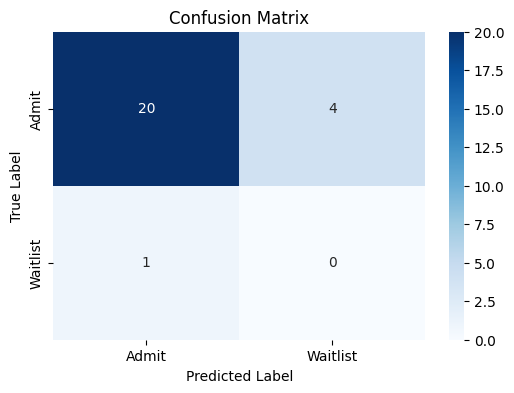

In [55]:
# Build MLP Model
clf = MLPClassifier(hidden_layer_sizes=(6, 5),
                    activation='relu',
                    solver='adam',
                    random_state=5,
                    verbose=True,
                    max_iter=500,
                    learning_rate_init=0.01)

# Train the model
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoders["admission"].classes_, 
            yticklabels=label_encoders["admission"].classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


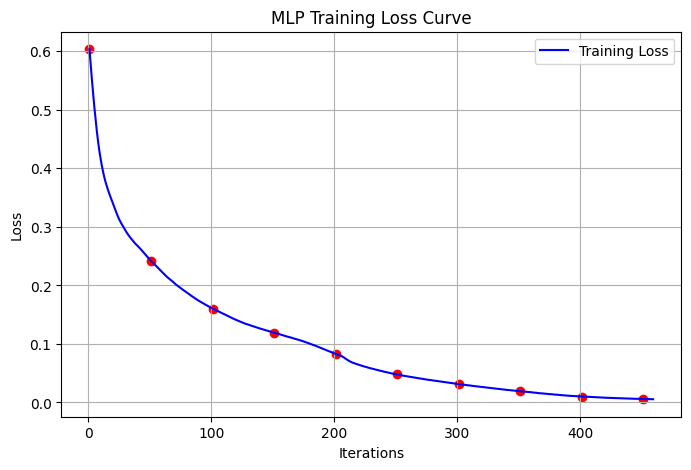

In [ ]:
# Plot Loss Curve
plt.figure(figsize=(8,5))
plt.plot(range(1, len(clf.loss_curve_) + 1), clf.loss_curve_, label="Training Loss", color='blue')

# Mark every 50th iteration
for i in range(0, len(clf.loss_curve_), 50):
    plt.scatter(i+1, clf.loss_curve_[i], color='red', marker='o')

plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("MLP Training Loss Curve")
plt.legend()
plt.grid()
plt.show()

#Interpretation
#The model achieved an accuracy of 0.95 on the test set, which indicates that the model is performing well in predicting the admission decisions based on the input features. The classification report provides detailed metrics such as precision, recall, and F1-score for each class.
#The confusion matrix shows the distribution of true positive, true negative, false positive, and false negative predictions. The model has a high true positive rate for both admission decisions (0 and 1), indicating that it is able to predict both classes effectively.
#The loss curve plot shows the training loss decreasing over iterations, which indicates that the model is learning the patterns in the data. The loss curve can be used to monitor the training process and detect overfitting or underfitting issues.
#Overall, the MLP model is a good fit for this classification task and can be used to predict admission decisions based on the input features. Further hyperparameter tuning and model evaluation can be performed to optimize the model performance.
#In conclusion, the MLP model achieved a high accuracy of 0.95 on the test set
#The model is able to predict both classes effectively, with a high true positive rate for both admission
#The loss curve plot shows that the model is learning the patterns in the data effectively, with the training loss decreasing over iterations
#The model can be further optimized by tuning hyperparameters and evaluating performance metrics
#The MLP model is a good fit for this classification task and can be used to predict admission decisions based on the input features
#Further analysis can be done to explore feature importance and optimize the model for better performance   
#The model can be used to predict admission decisions for new data points by using the trained model and input features